In [2]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\jayyanar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Import the dataset - But chase the dataset name but use the same variable

dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# Identify the shape of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [12]:
# Verify if there is any null values
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [29]:
# Set the Independent Variable (X) and dependent variable (y) = f(x)=y
## Make sure always X is matrix and Y is vector

X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

In [33]:
# Split the dataset into Training set and Testing Set.
# if there is very less dataset , You can ignore the split the dataset
#X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [52]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
ln_regressor = LinearRegression()
ln_regressor.fit(X,y)

In [79]:
# Fit the Polynominal regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 4)# This will create a two column with square and square of new column
X_poly = poly_regressor.fit_transform(X)

# Fit the Polynomial X_poly with Y using LinearRegression
ln_regressor_2 = LinearRegression()
ln_regressor_2.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
# Predicting the new results with Linear regression for 6.5 level experience
ln_regressor.predict(6.5)

array([ 330378.78787879])

In [84]:
ln_regressor_2.predict(poly_regressor.fit_transform(6.5))

array([ 158862.4526516])

In [85]:
# Predicting the new results with Linear regression for CEO
ln_regressor.predict(10)

array([ 613454.54545455])

In [86]:
# Predicting the new results with Polynomial Regression for CEO
ln_regressor_2.predict(poly_regressor.fit_transform(10))

array([ 988916.08391567])

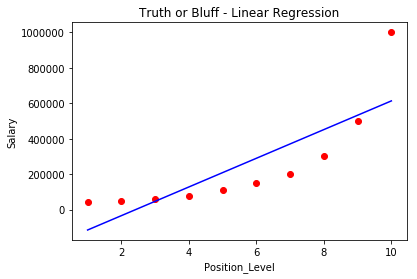

In [80]:
# Visualize the Linear regression Results
# Provide the X and real Salary 7

plt.scatter(X, y, color='red')
plt.plot(X, ln_regressor.predict(X), color='blue') # Use the Linear regression predict method to Predict the X
plt.title("Truth or Bluff - Linear Regression")
plt.xlabel("Position_Level")
plt.ylabel("Salary")
plt.show()

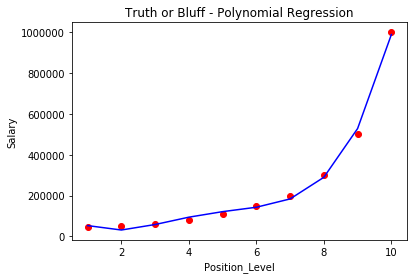

In [82]:
# Visualize the Polynomial Results

plt.scatter(X, y, color='red')
## Use the Linear regression predict method to Predict the X_poly where we done a transform for X by Squaring
plt.plot(X, ln_regressor_2.predict(poly_regressor.fit_transform(X)), color='blue') 
plt.title("Truth or Bluff - Polynomial Regression")
plt.xlabel("Position_Level")
plt.ylabel("Salary")
plt.show()

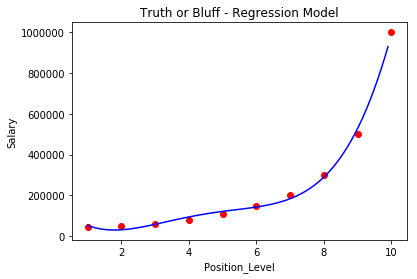

In [87]:
# Visualising the Regression Results for more interval and smoothness in X axis say (0.1) value
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) # This help 90 level of salary

plt.scatter(X, y, color='red')
# Use the Linear regression predict method to Predict the X
plt.plot(X_grid, ln_regressor_2.predict(poly_regressor.fit_transform(X_grid)), color='blue') 
plt.title("Truth or Bluff - Regression Model")
plt.xlabel("Position_Level")
plt.ylabel("Salary")
plt.show()